In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [456]:
output = pd.read_csv("output.csv", index_col=False)
output

,Clock,Event Type,Start Station,End Station,Customer Start Time,Train ID,Train Utilization
0,3.547465,Train Arrival,NaN,NaN,NaN,5.0,0.0
1,3.572686,Train Arrival,NaN,NaN,NaN,17.0,0.0
2,3.747039,Train Arrival,NaN,NaN,NaN,12.0,0.0
3,3.762453,Train Arrival,NaN,NaN,NaN,4.0,0.0
4,3.828234,Train Arrival,NaN,NaN,NaN,7.0,0.0
...,...,...,...,...,...,...,...
200658,1109.774448,Customer Departure,20.0,13.0,1059.860039,NaN,NaN
200659,1109.774448,Customer Departure,20.0,13.0,1073.481690,NaN,NaN
200660,1109.774448,Customer Departure,21.0,13.0,1059.911815,NaN,NaN
200661,1109.774448,Customer Departure,23.0,13.0,1036.491663,NaN,NaN


In [457]:
len(output[output["Event Type"] == "Train Arrival"])

3981

In [458]:
output["Trip Distance"] = abs(output["Start Station"] - output["End Station"])
output["Trip Duration"] = output["Clock"] - output["Customer Start Time"]

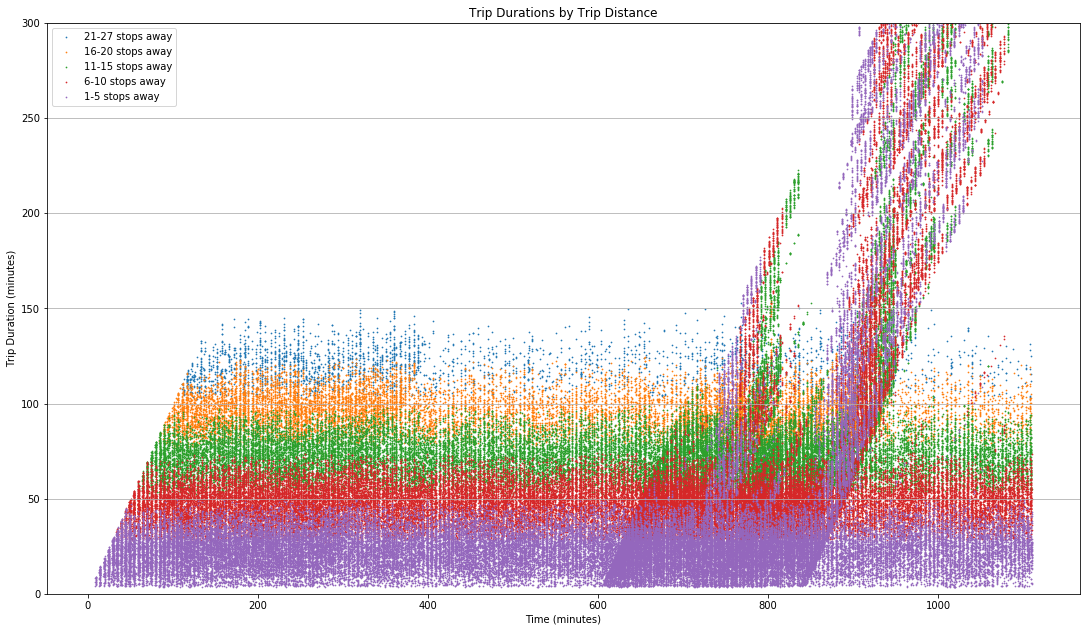

In [459]:
trips = output[output["Event Type"] == "Customer Departure"]

intervals = [range(i*5+1, i*5+6) for i in range(5)]
intervals[-1] = range(21, 28)
for interval in reversed(intervals):
    vs = trips[trips["Trip Distance"].isin(interval)]
    plt.scatter(vs["Clock"], vs["Trip Duration"], label = f"{min(interval)}-{max(interval)} stops away", s = 0.5)
    
plt.ylabel("Trip Duration (minutes)")
plt.xlabel("Time (minutes)")
plt.ylim(0, 300)
plt.title("Trip Durations by Trip Distance")
plt.gcf().set_size_inches(18.5, 10.5)
plt.grid(axis = "y")
plt.legend()
plt.show()

In [460]:
train_arrs = output[output["Event Type"] == "Train Arrival"][["Clock", "Train ID", "Train Utilization"]].reset_index(drop = True)
history = []
total_time = train_arrs.iloc[-1]["Clock"]
n_trains = 24

for i, (clock, tid, util) in train_arrs.iterrows():
    last = 0
    train_last_arrs = train_arrs[:i]
    train_last_arrs = train_last_arrs[train_last_arrs["Train ID"] == tid]
    if len(train_last_arrs) > 1:
        last = train_last_arrs.iloc[-1]["Clock"]
    elapsed = clock - last
    history.append(util*elapsed/total_time/n_trains)
    
sum(history)

0.21532245081202386

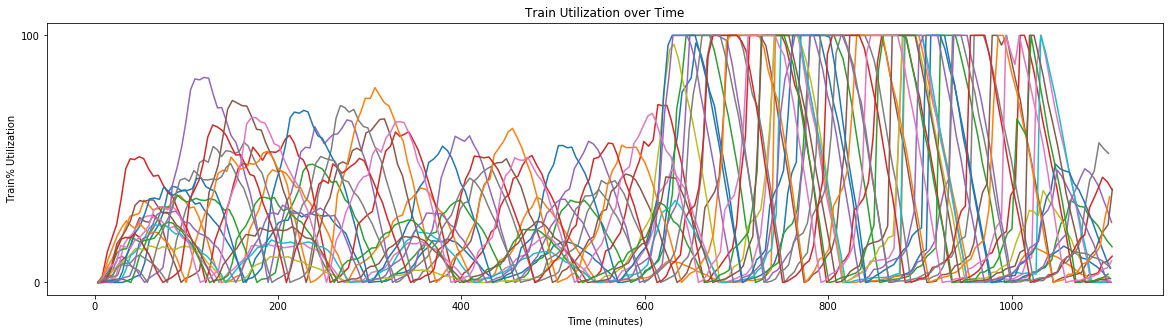

In [461]:
tids = train_arrs["Train ID"].unique()

for i, tid in enumerate(tids):
    train_hist = train_arrs[train_arrs["Train ID"] == tid]
    plt.plot(train_hist["Clock"], train_hist["Train Utilization"]*100)
plt.gca().set_ylabel(f"Train% Utilization")
plt.gca().set_yticks([0, 100])
    
plt.gca().set_xlabel("Time (minutes)")
plt.title("Train Utilization over Time")
plt.gcf().set_size_inches(20, 5)

In [130]:
util_by_train_cap = np.array([(1, 0.8862397457176563),
                     (10, 0.8060103949748458),
                     (20, 0.6847411336010519),
                     (30, 0.5062955040250796),
                     (40, 0.3797957499616623),
                     (50, 0.30383659996932966),
                     (60, 0.2531971666411083),
                     (70, 0.21702614283523552),
                     (80, 0.18989787498083116),
                     (90, 0.16879811109407208),
                     (100, 0.15191829998466483),
                     (110, 0.13810754544060438),
                     (120, 0.12659858332055415)])
util_by_train_cap[:,1] *= 100

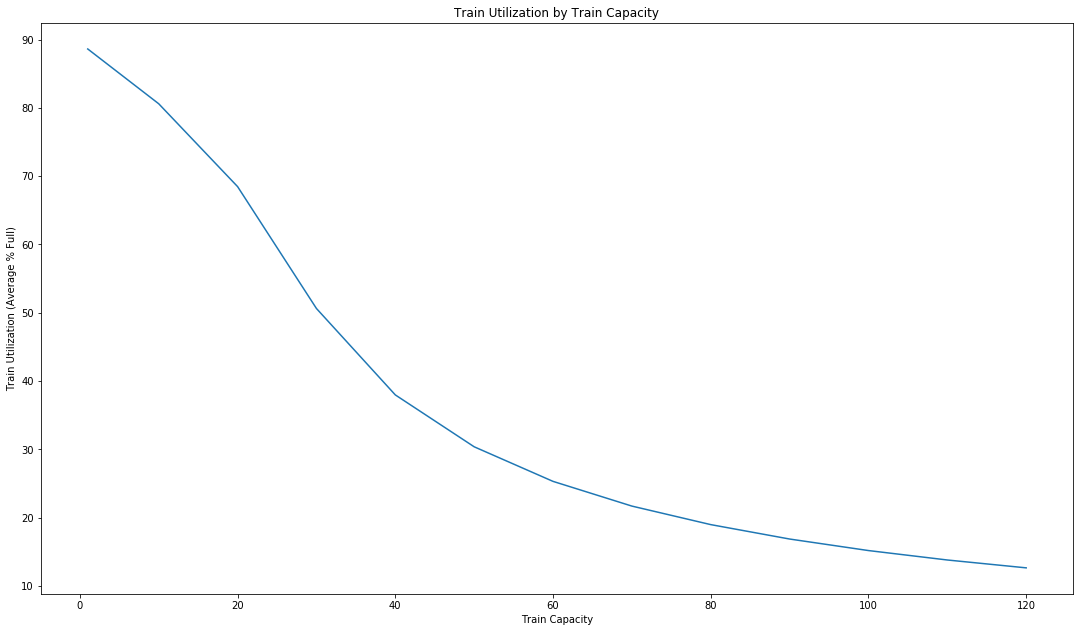

In [131]:
plt.plot(util_by_train_cap[:,0], util_by_train_cap[:,1])
plt.ylabel("Train Utilization (Average % Full)")
plt.xlabel("Train Capacity")
plt.title("Train Utilization by Train Capacity")
plt.gcf().set_size_inches(18.5, 10.5)

In [205]:
station_arrs = pd.read_csv("station_avg_arr_rates.csv")
station_arrs

,Station,Avg Daily Entries,AM Peak,Midday,PM Peak,Evening,Late Night
0,Wiehle-Reston East,4427,2738,686,830,172,1
1,Spring Hill,685,242,131,238,72,1
2,Greensboro,715,177,114,350,73,0
3,Tysons Corner,1893,325,312,870,384,3
4,McLean,1054,417,167,414,55,1
5,East Falls Church,3982,2523,673,585,196,5
6,Ballston-MU,10660,4332,1936,3430,944,22
7,Virginia Sq-GMU,3792,1838,669,980,299,4
8,Clarendon,4453,1863,781,1051,689,70
9,Court House,7004,3218,1263,1944,564,16


In [230]:
print(", ".join([str(270/a) for a in station_arrs["AM Peak"]]))

0.09861212563915267, 1.115702479338843, 1.5254237288135593, 0.8307692307692308, 0.6474820143884892, 0.1070154577883472, 0.062326869806094184, 0.14689880304678998, 0.14492753623188406, 0.0839030453697949, 0.06595017098192477, 0.11397214014352047, 0.19607843137254902, 0.17307692307692307, 0.17153748411689962, 1.560693641618497, 0.9440559440559441, 0.09930121368150055, 0.678391959798995, 0.31690140845070425, 0.12987012987012986, 0.14180672268907563, 0.24258760107816713, 0.18543956043956045, 0.23316062176165803, 0.14203051025775906, 0.2107728337236534, 0.08695652173913043


In [231]:
print(", ".join([str(330/a) for a in station_arrs["Midday"]]))

0.48104956268221577, 2.519083969465649, 2.8947368421052633, 1.0576923076923077, 1.9760479041916168, 0.4903417533432392, 0.17045454545454544, 0.49327354260089684, 0.4225352112676056, 0.26128266033254155, 0.11262798634812286, 0.08711721224920803, 0.10125805461798097, 0.1373283395755306, 0.07542857142857143, 0.22964509394572025, 0.15827338129496402, 0.09874326750448834, 0.3179190751445087, 0.205607476635514, 0.25287356321839083, 0.39903264812575573, 0.5172413793103449, 0.4532967032967033, 0.7746478873239436, 0.497737556561086, 1.064516129032258, 0.46544428772919605


In [232]:
print(", ".join([str(240/a) for a in station_arrs["PM Peak"]]))

0.2891566265060241, 1.0084033613445378, 0.6857142857142857, 0.27586206896551724, 0.5797101449275363, 0.41025641025641024, 0.06997084548104957, 0.24489795918367346, 0.22835394862036157, 0.12345679012345678, 0.0395908940943583, 0.024166750578995064, 0.01867704280155642, 0.027158537965372865, 0.016238159675236806, 0.041300980898296334, 0.035000729181857954, 0.018972332015810278, 0.06330783434450013, 0.05781739339918092, 0.16216216216216217, 0.42328042328042326, 0.38961038961038963, 0.5466970387243736, 1.0212765957446808, 0.7619047619047619, 1.2698412698412698, 0.5106382978723404


In [233]:
print(", ".join([str(300/a) for a in station_arrs["Evening"]]))

1.744186046511628, 4.166666666666667, 4.109589041095891, 0.78125, 5.454545454545454, 1.530612244897959, 0.3177966101694915, 1.0033444816053512, 0.43541364296081275, 0.5319148936170213, 0.2170767004341534, 0.0757193336698637, 0.09305210918114144, 0.15360983102918588, 0.05842259006815969, 0.3464203233256351, 0.29239766081871343, 0.20449897750511248, 0.7425742574257426, 0.3250270855904659, 0.379746835443038, 1.2195121951219512, 1.2048192771084338, 1.5706806282722514, 2.803738317757009, 1.7964071856287425, 2.4, 1.2096774193548387


In [416]:
from PIL import Image, ImageDraw

img_w = 300
img_h = 1000

st_w = 20
tr_w = 30
tc = (255, 0, 0)
def gen_img():
    im = Image.new('RGB', (img_w, img_h), (255, 255, 255))
    draw = ImageDraw.Draw(im)
    return im, draw

def draw_line(station_names):
    im, draw = gen_img()
    incr = img_h/len(station_names)
    for i, station in enumerate(station_names):
        draw.ellipse((img_w/2 - st_w/2, incr*i,
                      img_w/2 + st_w/2, incr*i + st_r),
                     fill=(128, 128, 128), outline=(0, 0, 0))
        if i + 1 != len(station_names):
            draw.line((img_w/2, incr*i + st_w, img_w/2, incr*(i + 1)), fill = (0, 0, 0))
        draw.text((img_w/2 + st_w, incr*i), station, fill=(0, 0, 0))
    return im, draw

def draw_train(draw, i, n):
    y = img_h/n*i
    draw.rectangle((img_w/2 - tr_w*3/2, y + st_w/2,
              img_w/2 - tr_w/2, y + st_w),
             fill=tc, outline=(0,0,0))
    draw.rectangle((img_w/2 - tr_w*3/2, y,
              img_w/2 - tr_w*9/8, y + st_w/2),
             fill=tc, outline=(0,0,0))
    draw.rectangle((img_w/2 - tr_w*3/4, y,
              img_w/2 - tr_w*7/8, y + st_w/2),
             fill=tc, outline=(0,0,0))

    draw.ellipse((img_w/2 - tr_w*3/2, y + st_w,
              img_w/2 - tr_w*3/2 + st_w/2, y + st_w*3/2),
             fill=tc, outline=(0,0,0))
    draw.ellipse((img_w/2 - tr_w, y + st_w,
              img_w/2 - tr_w + st_w/2, y + st_w*3/2),
             fill=tc, outline=(0,0,0))
    draw.ellipse((img_w/2 - tr_w + st_w/2, y + st_w,
              img_w/2 - tr_w + st_w, y + st_w*3/2),
             fill=tc, outline=(0,0,0))

    draw.line((img_w/2 - tr_w*3/2, y + st_w*5/4,
              img_w/2 - tr_w + st_w/2, y + st_w*5/4),
             fill=(0,0,0))

def draw_line_w_trains(station_data, occ_arr):
    im, draw = draw_line(station_data["Station"])
    for i, station in enumerate(station_data["Station"]):
        if occ_arr[station]:
            draw_train(draw, i, len(station_data))

    return im

In [425]:
current_time = 0
im = None
for i, row in pd.read_csv("station_output.csv").iterrows():
    event_time = int(row["Clock"])
    while(current_time <= event_time):
        print(current_time) 
        current_time += 1
        im = draw_line_w_trains(station_arrs, row)
        im.save(f"anim_frames/frame_{current_time}.png")
        if current_time > 199:
            break
    if current_time > 199:
        break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


1.3103079863539833
0.34610674421920845
0.12358349709901584
75.18770193436137
50.819700564823926
45.562172038561485


Text(0.5,0,'Average Time (Minutes)')

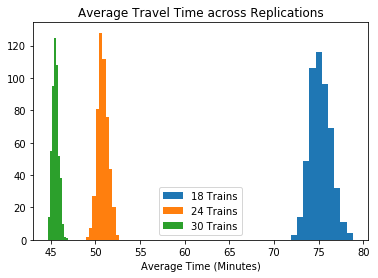

In [455]:
t18 = pd.read_csv("replication_data/18_trains.csv")
t24 = pd.read_csv("replication_data/24_trains.csv")
t30 = pd.read_csv("replication_data/30_trains.csv")
print(t18["avg"].var())
print(t24["avg"].var())
print(t30["avg"].var())

plt.hist(t18["avg"], label = "18 Trains")
plt.hist(t24["avg"], label = "24 Trains")
plt.hist(t30["avg"], label = "30 Trains")

print(t18["avg"].mean())
print(t24["avg"].mean())
print(t30["avg"].mean())
plt.title("Average Travel Time across Replications")
plt.legend()
plt.xlabel("Average Time (Minutes)")

In [462]:
print(t18["max"].var())
print(t24["max"].var())
print(t30["max"].var())
print(t18["max"].mean())
print(t24["max"].mean())
print(t30["max"].mean())

55.202596469038795
208.5544904061886
11.638856149208852
457.26409856792776
321.0774189580929
145.9803976735447
